Define paths

In [2]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks




import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
cmap = cm.Spectral_r
from sklearn import preprocessing

Define variables and upload data for figures

In [9]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'

L=50; dx =1; J = int(L/dx)
T =3000; dt = 0.05; N = int(T/dt)
boundaryCoeff=2;rate=0.01
# filename='%s_variant%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%s_J%s_T%s_N%s'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
parID_list = pickle.load(open( modellingpath + '/growth/out/numerical/%s/%s/simulation/parID_list_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), "rb" ) )
pattern_df = pickle.load(open( modellingpath + '/growth/out/patternAnalysis/%s/%s/pattern/pattern_df_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), 'rb'))


Plot solution U with peaks

In [4]:
def plot1D(U,morphogen='both', savefig=False,filename='',savefigpath='',pad=0.001,round=False, plotPeaks=False, peaks=False):
    if round==True:
        U = np.round(U,decimals=3)
    if morphogen == 0:
        plt.plot(U[0], label='U')
    if morphogen ==1: 
        plt.plot(U[1], label='V')
    if morphogen == 'both': 
        fig,ax = plt.subplots()
        ax.plot(U[0], label='U', color='blue')
        ax.set_ylim(np.amin(U[0])-pad, np.amax(U[0])+pad)
        ax.legend(loc=2) #upper left
        ax.ticklabel_format(useOffset=False)

        ax2=ax.twinx()
        ax2.plot(U[1], label='V', color='red')
        ax2.set_ylim(np.amin(U[1])-pad, np.amax(U[1])+pad)
        ax2.legend(loc=1) #upper right

        ax.ticklabel_format(useOffset=False)
        if plotPeaks==True:
            ax.plot(peaks[0],U[0][peaks[0]], 'o', color='blue')
            ax2.plot(peaks[1],U[1][peaks[1]], 'o', color='red')



    plt.ticklabel_format(useOffset=False)
    plt.xlabel('Space')
    plt.ylabel('Concentration')
    if savefig==True:
        plt.savefig('%s%s.jpeg'%(savefigpath,filename))
    else:
        plt.show()

In [5]:
def countPeaks(U, showplot1D=True):
    peaks = [0,0]
    peaks[0], _ = find_peaks(U[0], prominence=0.1)
    peaks[1], _ = find_peaks(U[1], prominence=0.1)
    print(peaks)
    plot1D(U,plotPeaks=True, peaks=peaks)
    
    return peaks
    


In [6]:



def stdPeakDist(U, showplot1D=True,printStd=True):
    peaks = countPeaks(U, showplot1D=showplot1D)
    #calculate distance between peaks
    peak0 = peaks[0]
    #calculate distance between peaks in peak0
    std=[0,0]
    for count,peak in enumerate(peaks):
        if len(peak)>1:
            peak_dist = [(peak[i+1] - peak[i]) for i in range(len(peak)-1)]
            # print(peak_dist)
            # peak_dist = [np.linalg.norm(peak[i]-peak[i+1]) for i in range(len(peak)-1)]
            normalised_peak_dist = peak_dist/np.sum(peak_dist)
            # print(normalised_peak_dist)
            std[count] = np.std(normalised_peak_dist)

        else:
            std[count] = 1
    if printStd==True:
        print(std)

    return std

In [17]:
pattern1 = pattern_df[pattern_df['pattern']=='Stationary spatial wave']



Stationary spatial wave
[array([ 8, 14, 22]), array([ 8, 21])]


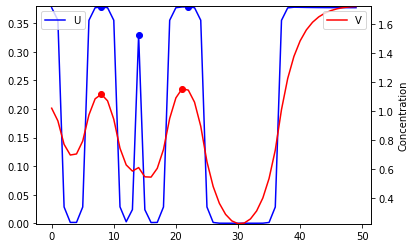

[0.07142857142857142, 0.0]
-----------------
Stationary spatial wave
[array([25]), array([21])]


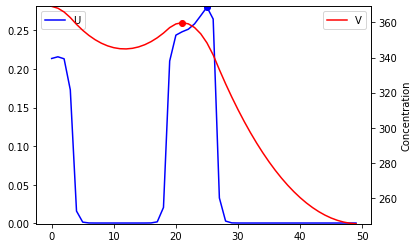

[1, 1]
-----------------
Stationary spatial wave
[array([22]), array([22])]


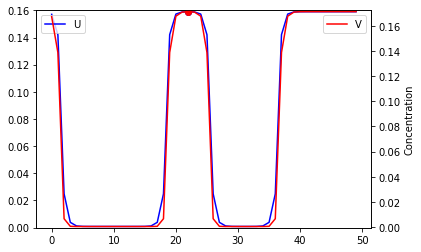

[1, 1]
-----------------
Stationary spatial wave
[array([ 8, 22]), array([ 8, 22])]


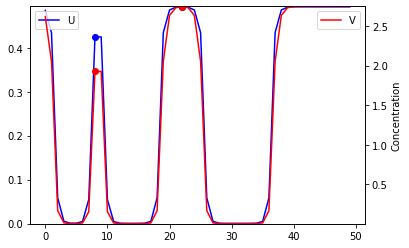

[0.0, 0.0]
-----------------
Stationary spatial wave
[array([ 8, 22, 39]), array([ 8, 22, 39])]


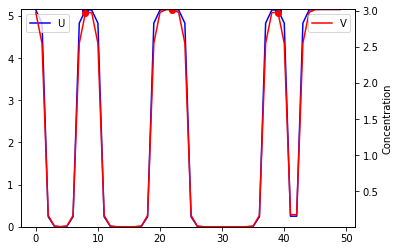

[0.04838709677419353, 0.04838709677419353]
-----------------
Stationary spatial wave
[array([25]), array([21])]


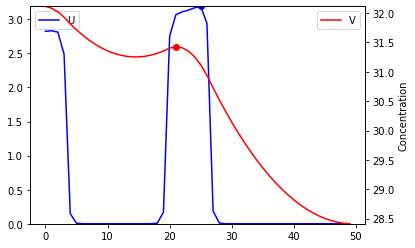

[1, 1]
-----------------
Stationary spatial wave
[array([24]), array([24])]


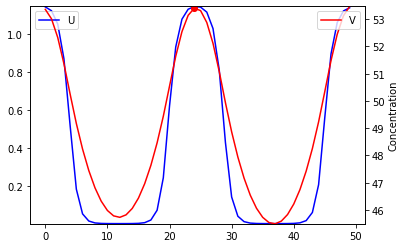

[1, 1]
-----------------
Stationary spatial wave
[array([ 8, 23]), array([ 8, 22])]


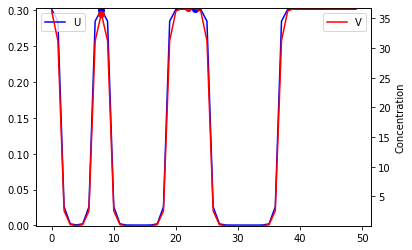

[0.0, 0.0]
-----------------
Stationary spatial wave
[array([ 4, 12, 17, 29, 39]), array([ 2, 12, 21, 27, 41, 45])]


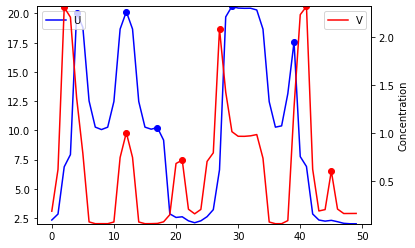

[0.07388628880563286, 0.08002163039109421]
-----------------
Stationary spatial wave
[array([ 2, 12, 20, 24, 27, 30, 33, 37, 40, 45]), array([ 4, 12, 17, 23, 30, 38, 47])]


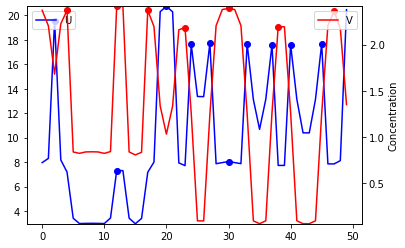

[0.05566061816159694, 0.03124906103991686]
-----------------
Stationary spatial wave
[array([ 8, 14, 22, 39]), array([], dtype=int64)]


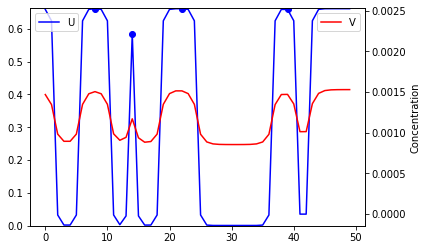

[0.1543301085420142, 1]
-----------------
Stationary spatial wave
[array([ 6, 12]), array([], dtype=int64)]


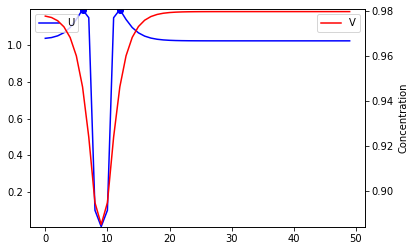

[0.0, 1]
-----------------
Stationary spatial wave
[array([ 8, 22, 39]), array([], dtype=int64)]


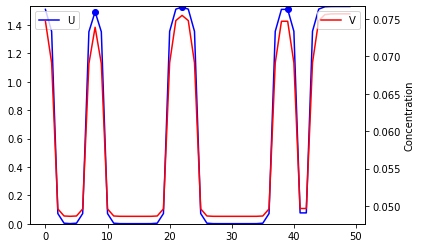

[0.04838709677419353, 1]
-----------------
Stationary spatial wave
[array([22]), array([], dtype=int64)]


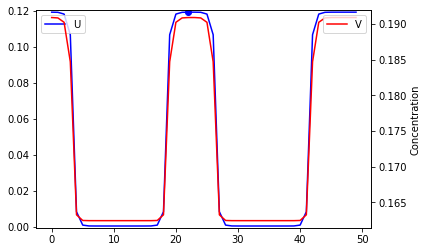

[1, 1]
-----------------
Stationary spatial wave
[array([20, 24, 38]), array([22])]


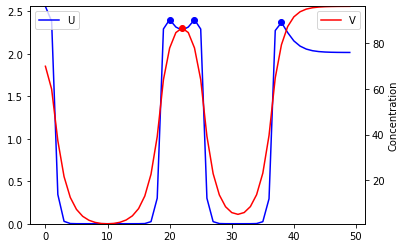

[0.2777777777777778, 1]
-----------------
Stationary spatial wave
[array([22]), array([], dtype=int64)]


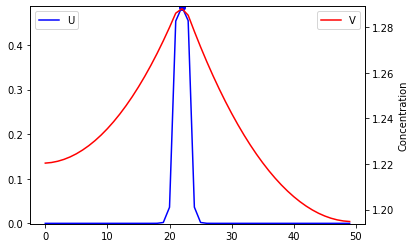

[1, 1]
-----------------
Stationary spatial wave
[array([22, 38]), array([22, 38])]


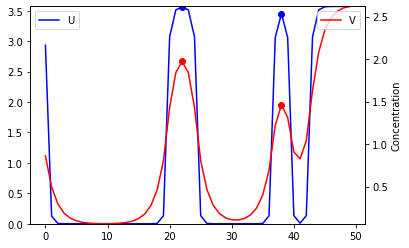

[0.0, 0.0]
-----------------
Stationary spatial wave
[array([ 8, 22]), array([ 8, 22])]


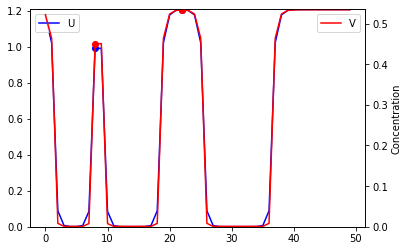

[0.0, 0.0]
-----------------
Stationary spatial wave
[array([], dtype=int64), array([ 8, 24])]


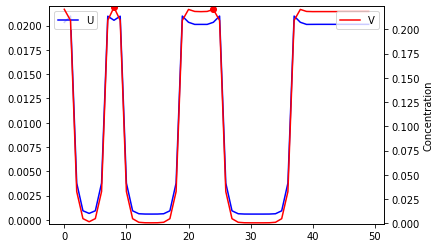

[1, 0.0]
-----------------
Stationary spatial wave
[array([ 8, 22]), array([ 8, 22])]


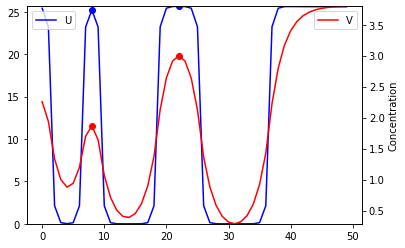

[0.0, 0.0]
-----------------
Stationary spatial wave
[array([ 8, 21, 39]), array([], dtype=int64)]


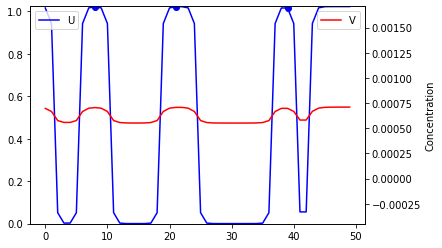

[0.08064516129032259, 1]
-----------------
Stationary spatial wave
[array([ 5, 14, 25, 37, 45]), array([ 5, 14, 25, 37, 46])]


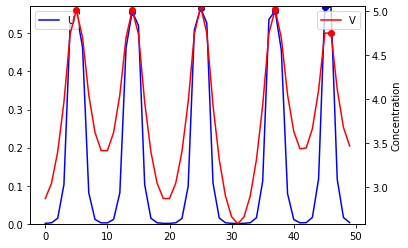

[0.039528470752104736, 0.03168385623601604]
-----------------
Stationary spatial wave
[array([38]), array([38])]


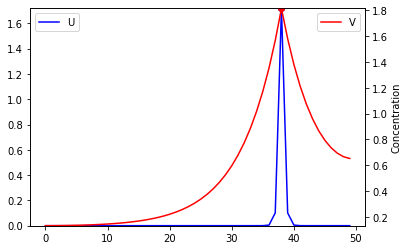

[1, 1]
-----------------
Stationary spatial wave
[array([22, 39]), array([], dtype=int64)]


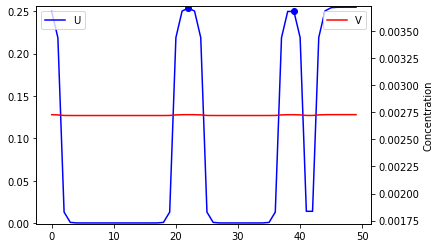

[0.0, 1]
-----------------
Stationary spatial wave
[array([ 8, 22, 38]), array([ 8, 22, 38])]


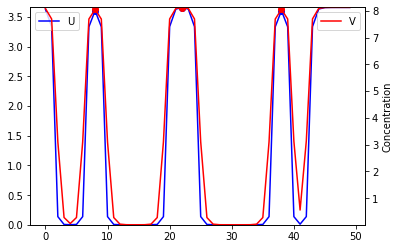

[0.033333333333333326, 0.033333333333333326]
-----------------
Stationary spatial wave
[array([ 8, 14, 22]), array([], dtype=int64)]


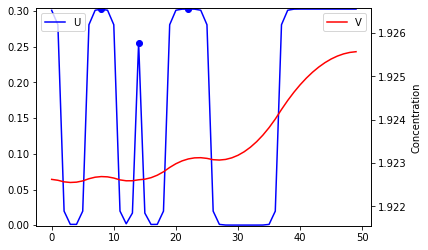

[0.07142857142857142, 1]
-----------------
Stationary spatial wave
[array([ 8, 14, 21, 39]), array([], dtype=int64)]


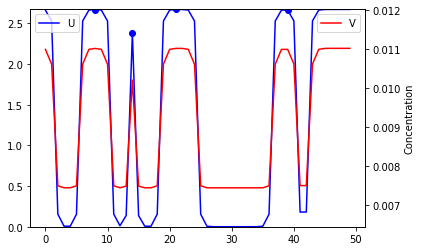

[0.17537103688494723, 1]
-----------------
Stationary spatial wave
[array([20, 38, 43]), array([23, 42])]


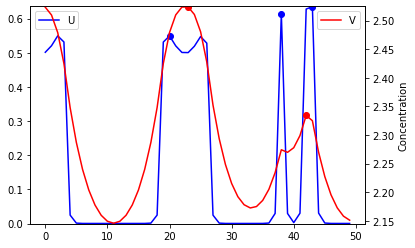

[0.28260869565217395, 0.0]
-----------------
Stationary spatial wave
[array([22, 39]), array([22, 39])]


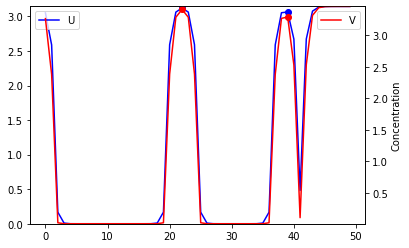

[0.0, 0.0]
-----------------
Stationary spatial wave
[array([], dtype=int64), array([], dtype=int64)]


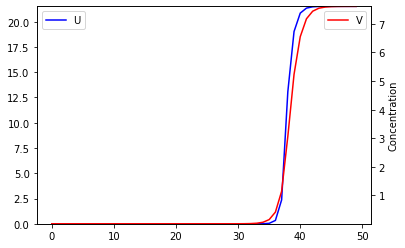

[1, 1]
-----------------


In [20]:
for i in pattern1.index[:30]:
    print(pattern_df.loc[i]['pattern'])
    parIDss = f'{i[0]}.{i[1]}'
    U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parIDss)), 'rb'))
    # countPeaks(U_final)
    stdPeakDist(U_final)
    print('-----------------')

In [5]:
parID=41018
U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
n_peaks=[]
position_peaks = []
for count,UX_snapshot in enumerate(U_record[0][-20:]):
    peaks, _ = find_peaks(UX_snapshot, prominence=0.1)
    n_peaks.append(len(peaks))
    position_peaks.append(peaks)

if all(x==n_peaks[0] for x in n_peaks):
    print('constant number of peaks')

if np.all([x==position_peaks[0] for x in position_peaks]):
    print('constant position peaks')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mo2016/Documents/modelling/growth/out/numerical/turinghill/nogrowth/data/2Dfinal_turinghill_variant0_nogrowth_ID41018_L50_J250_T500_N12500.pkl'

In [25]:
dx = float(L)/float(J-1)

x_grid = np.array([j*dx for j in range(J)])
reduced_t_grid = np.arange(0,T,10) 

surfpattern(U_record, grids=[x_grid,reduced_t_grid], growth='linear',morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False,L=L,J=J,T=T,record_every_x_hours=10)



TypeError: surfpattern() got an unexpected keyword argument 'L'

[array([], dtype=int64), array([], dtype=int64)]
morphogen = both
show


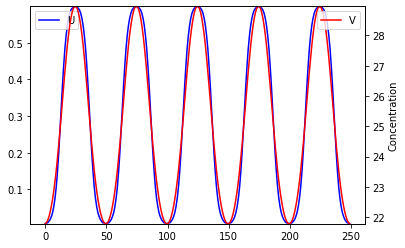

[1, 1]


In [9]:

parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
# entropy = entropyPeakDist(U,plotHist=False)
var=varPeakDist(U)


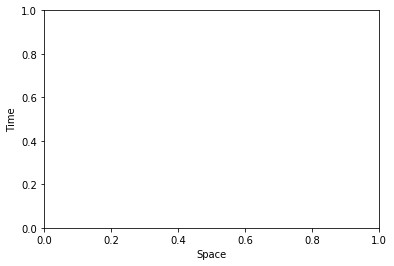

[1, 1]


In [8]:
parID=30997
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)


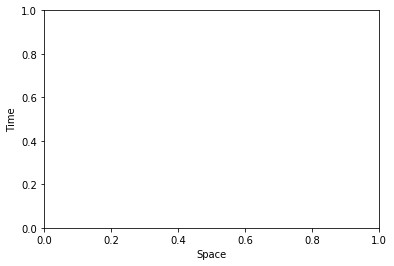

[1, 1]


In [9]:
parID=1
U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
var=varPeakDist(U)
